# Tema 1 Invatare Supervizata - Brain Tumor MRI Classification

### Alexandru LICURICEANU - 341C4

### Prerequisites

In [204]:
import os
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.model_selection import KFold
from torch.utils.data import Subset, DataLoader
import torchvision.transforms as transforms
import monai
import PIL

RANDOM_STATE = 123
LABELS = ["glioma_tumor", "meningioma_tumor", "no_tumor", "pituitary_tumor"]

print(torch.cuda.is_available())

%matplotlib inline
plt.style.use('dark_background')

True


### Task 1

In [205]:
class BrainTumorDataset(torch.utils.data.Dataset):

    def __init__(self, root_dir, transform=None):
        self.root_dir = root_dir
        self.transform = transform
        self.image_paths = []
        self.labels = []

        self.classes = LABELS

        for label in self.classes:

            label_dir = os.path.join(root_dir, label)
            if os.path.isdir(label_dir):

                for file_name in os.listdir(label_dir):
                    file_path = os.path.join(label_dir, file_name)
                    self.image_paths.append(file_path)
                    self.labels.append(label)

    def __len__(self):
        return len(self.image_paths)

    def __getitem__(self, index):
        image_path = self.image_paths[index]
        label = self.labels[index]

        image = PIL.Image.open(image_path)

        if self.transform:
            image = self.transform(image)
        
        return image, label


### Task 2


In [206]:
train_dataset = BrainTumorDataset("Training")
test_dataset = BrainTumorDataset("Testing")



### Task 3

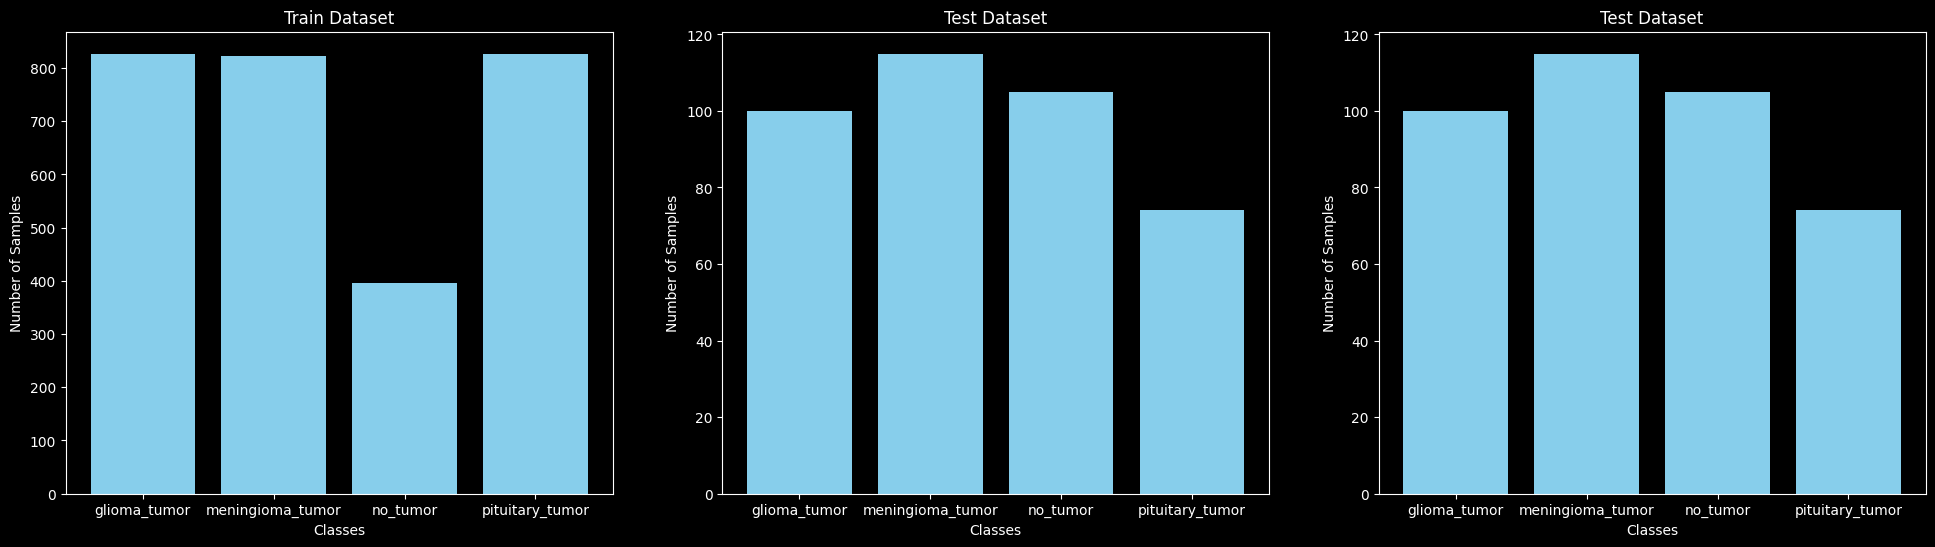

In [207]:
def plot_class_distribution(dataset, title, ax_index):
    labels = [label for _, label in dataset]
    unique, counts = np.unique(labels, return_counts=True)
    ax = axes[ax_index]
    ax.bar(unique, counts, color='skyblue')
    ax.set_xlabel("Classes")
    ax.set_ylabel("Number of Samples")
    ax.set_title(title)
    plt.title(title)

fig, axes = plt.subplots(1, 3, figsize=(24, 6))

plot_class_distribution(train_dataset, "Train Dataset", 0)
plot_class_distribution(test_dataset, "Test Dataset", 1)
plot_class_distribution(test_dataset, "Test Dataset", 2)

### Task 4

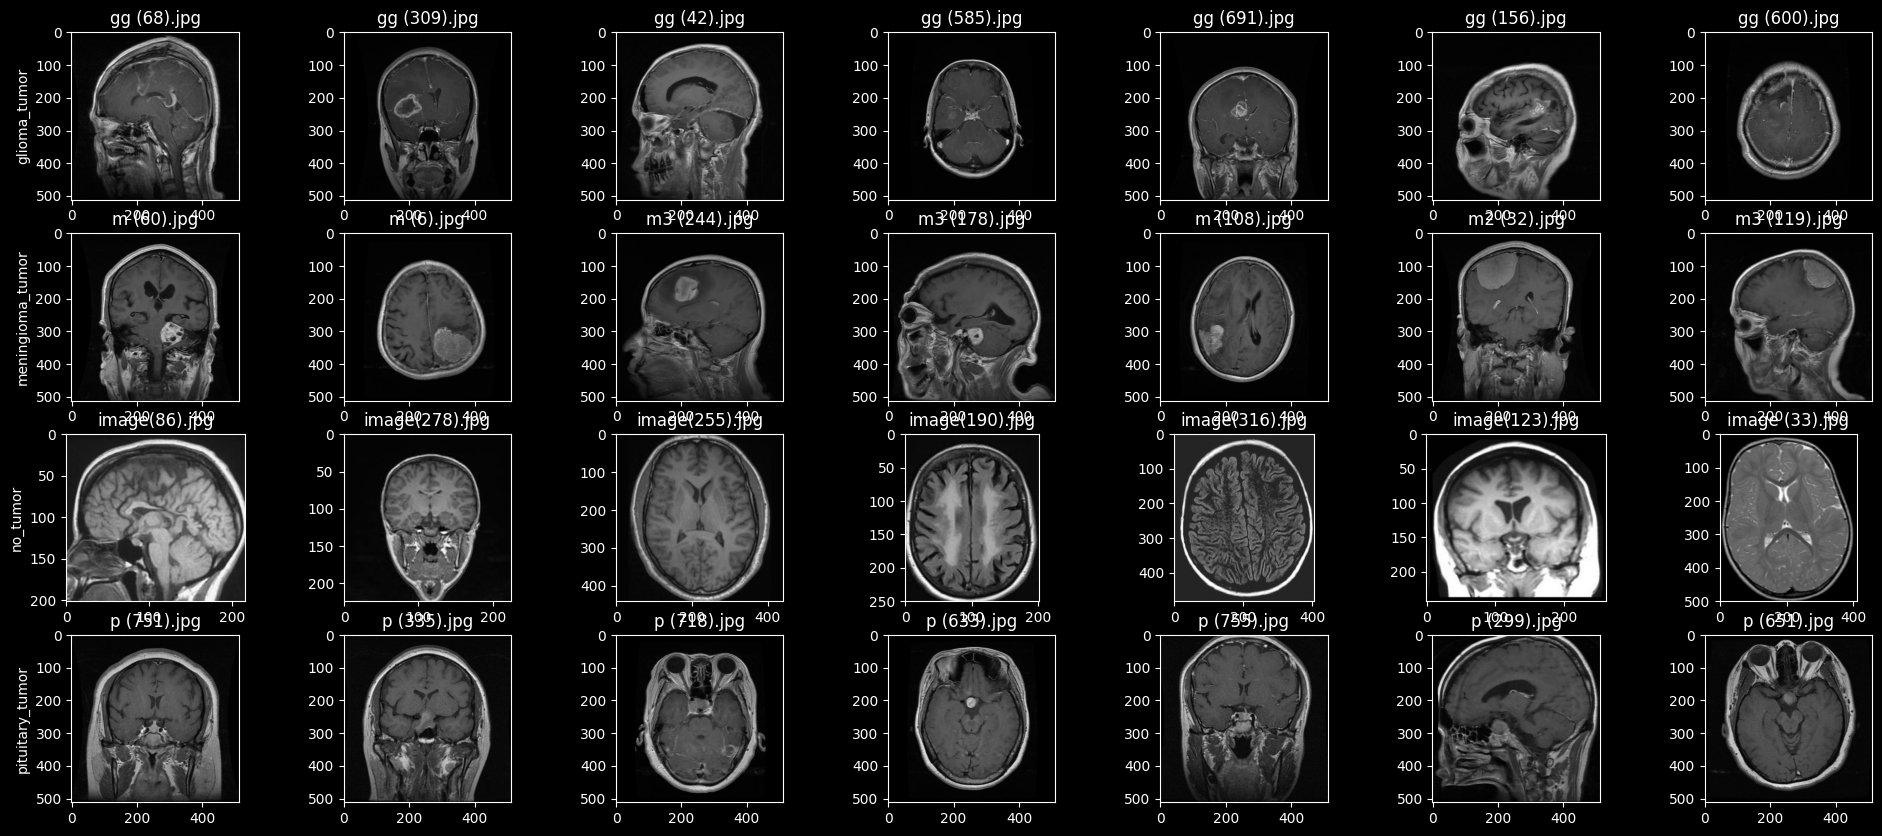

In [208]:
nr_images_each = 7
fig, axes = plt.subplots(len(LABELS), nr_images_each, figsize=(24, 10))

for i, label in enumerate(LABELS):
    axes[i][0].set_ylabel(label)

    image_files = os.listdir(f"Training/{label}")
    np.random.shuffle(image_files)

    image_files = image_files[:nr_images_each]

    for j, file_name in enumerate(image_files):

        image_path = os.path.join(f"Training/{label}", file_name)
        image = PIL.Image.open(image_path)
        axes[i][j].imshow(image)
        axes[i][j].title.set_text(file_name)

### Task 5